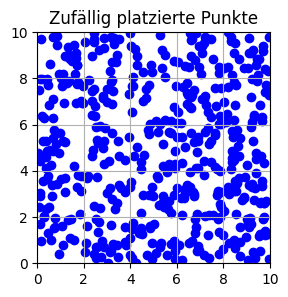

In [70]:
#%pip install numpy
#%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Anzahl der Punkte definieren
number_of_points = 500
# Erzeuge 'number_of_points' zufällige x- und y-Koordinaten im Bereich [0, 10]
x = np.random.rand(number_of_points) * 10
y = np.random.rand(number_of_points) * 10

# Erstelle eine Grafik und plotte die Punkte
plt.figure(figsize=(3, 3))
plt.scatter(x, y, color='blue')  # Zeichne die Punkte als Scatterplot
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)
plt.title('Zufällig platzierte Punkte')
plt.show()

# Kombiniere x und y zu Koordinatenpaaren
points = list(zip(x, y))


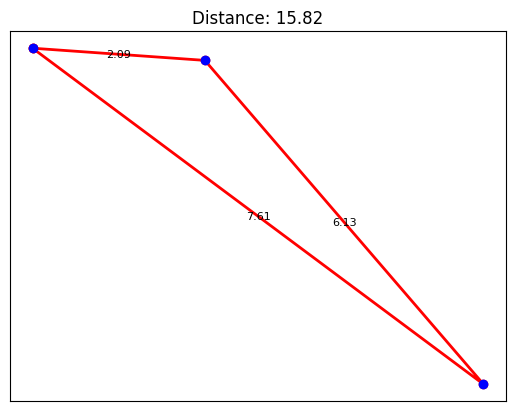

In [66]:
from itertools import permutations
import math



# Vereinfachte Distanzfunktion unter Verwendung von math.dist.
def route_distance(route):
    # Für eine gegebene Route berechnen wir die Gesamtdistanz,
    # indem wir die Distanzen zwischen jedem aufeinanderfolgenden Punktpaar aufsummieren.
    # Dabei wird math.dist() verwendet, um die euklidische Distanz zwischen zwei Punkten zu berechnen.
    d = sum(math.dist(route[i], route[i+1]) for i in range(len(route)-1))
    
    # Abschließend wird die Distanz vom letzten Punkt zurück zum Startpunkt addiert,
    # um den Rundweg zu schließen.
    return d + math.dist(route[-1], route[0])

# Initialisiere best_distance mit unendlich, sodass jede berechnete Route kürzer ist.
best_distance = math.inf
# Initialisiere best_route_local, um später die optimale Route zu speichern.
best_route_local = None

# Suche die beste Route, indem alle Permutationen geprüft werden | https://docs.python.org/3/library/itertools.html 
for route in permutations(points): # r-Länge, alle möglichen Permutationen ohne wiederholte Elemente
    d_current = route_distance(route)
    if d_current < best_distance:
        best_distance = d_current
        best_route_local = route
# FRAGE : Wie ist die Laufzeit dieser Funktion? | O(n!) https://de.wikipedia.org/wiki/Fakult%C3%A4t_(Mathematik)


# Erstelle eine Grafik und plotte die Punkte
plt.clf()
plt.scatter([p[0] for p in points], [p[1] for p in points], color='blue', zorder=5)
xs = [p[0] for p in best_route_local] + [best_route_local[0][0]]
ys = [p[1] for p in best_route_local] + [best_route_local[0][1]]
plt.plot(xs, ys, color='red', linewidth=2, marker='o')

# Labeliere jede Kante mit ihrer Länge
for i in range(len(xs)-1):
    p1 = (xs[i], ys[i])
    p2 = (xs[i+1], ys[i+1])
    mid_x = (p1[0] + p2[0]) / 2
    mid_y = (p1[1] + p2[1]) / 2
    segment_length = math.dist(p1, p2)
    plt.text(mid_x, mid_y, f"{segment_length:.2f}", fontsize=8, color='black', ha='center', va='center')

plt.title(f"Distance: {best_distance:.2f}")
plt.xticks([])  # x- und y-Achsenbeschriftungen entfernen
plt.yticks([])  
plt.show()


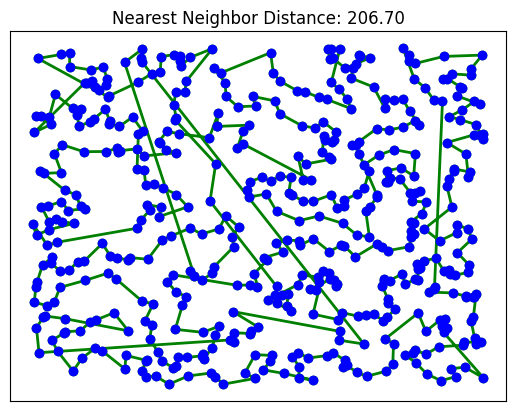

In [ ]:
def nearest_neighbor(points):
    # Falls keine Punkte vorhanden sind, gebe eine leere Liste zurück.
    if not points:
        return []
    
    # Beginne die Route mit dem ersten Punkt.
    route = [points[0]]
    # Erstelle eine Liste der noch nicht besuchten Punkte (außer dem Startpunkt).
    remaining_points = points[1:]
    
    # Solange noch Punkte übrig sind:
    while remaining_points:
        # Der aktuelle Punkt ist immer der letzte in der Route.
        current = route[-1]
        # Finde den nächsten Punkt, der am nächsten zum aktuellen liegt.
        nearest = min(remaining_points, key=lambda p: math.dist(current, p))
        # Füge diesen Punkt der Route hinzu.
        route.append(nearest)
        # Entferne den neu besuchten Punkt aus der Liste der verbleibenden Punkte.
        remaining_points.remove(nearest)
    
    return route
    # FRAGE : Wie ist die Laufzeit dieser Funktion? | O(n^2) wesentlich schneller als o(n!)

# Berechne die Route mittels Nearest-Neighbor-Verfahren.
nn_route = nearest_neighbor(points)
# Berechne die Gesamtdistanz der gefundenen Route, inklusive Rückweg zum Startpunkt.
nn_distance = route_distance(nn_route)

# Plotten der Nearest-Neighbor-Route:
plt.clf()  # Aktuelle Grafik löschen

# Extrahiere die x- und y-Koordinaten aller Punkte und plote sie als blauen Scatterplot.
x_coords = [p[0] for p in points]
y_coords = [p[1] for p in points]
plt.scatter(x_coords, y_coords, color='blue', zorder=5)

# Erstelle Listen für die x- und y-Koordinaten der Route.
# Schließe die Route, indem du den Startpunkt am Ende wieder hinzufügst.
xs_nn = [p[0] for p in nn_route] + [nn_route[0][0]]
ys_nn = [p[1] for p in nn_route] + [nn_route[0][1]]
# Verbinde die Punkte der Route mit einer grünen Linie und markiere jeden Punkt.
plt.plot(xs_nn, ys_nn, color='green', linewidth=2, marker='o')

# Füge einen Titel hinzu, der die Gesamtdistanz der Route anzeigt.
plt.title(f"Nearest Neighbor Distance: {nn_distance:.2f}")
# Entferne die Achsenbeschriftungen.
plt.xticks([])
plt.yticks([])
plt.show()